# 数据探索

    0列为pregnants(怀孕次数)； 
    1列为Plasma_glucose_concentration(口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度)；
    2列为blood_pressure(舒张压,单位:mm Hg） 
    3列为Triceps_skin_fold_thickness(三头肌皮褶厚度,单位：mm） 
    4列为serum_insulin(餐后血清胰岛素,单位:mm） 
    5列为BMI,体重指数（体重（公斤）/ 身高（米）^2）
    6列为Diabetes_pedigree_function(糖尿病家系作用)
    7列为Age(年龄) 
    8列为Target(分类变量,0或1）

In [1]:
#首先 import 必要的模块
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

In [7]:
train = pd.read_csv("pima-indians-diabetes.csv")
train.head()
print("train shape: ", train.shape)

train shape:  (768, 9)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnants                       768 non-null int64
Plasma_glucose_concentration    768 non-null int64
blood_pressure                  768 non-null int64
Triceps_skin_fold_thickness     768 non-null int64
serum_insulin                   768 non-null int64
BMI                             768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Target                          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


该数据集已知存在缺失值，某些列中存在的缺失值被标记为0。通过这些列中指标的定义和相应领域的常识可以证实上述观点，譬如体重指数和血压两列中的0作为指标数值来说是无意义的。

In [9]:
#查看数值型特征的基本统计量
train.describe()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


结果中，很多列的最小值是0 ，这个不符合常理，根据说明得知，0代表缺失值
下列变量的最小值为0时数据无意义： 1、血浆葡萄糖浓度 2、舒张压 3、肱三头肌皮褶厚度 4、餐后血清胰岛素 5、体重指数

In [10]:
NaN_col_names = ['Plasma_glucose_concentration','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','BMI']
print((train[NaN_col_names] == 0).sum())

Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
dtype: int64


第1、2、5列中0值较少；相比较而言，第3、4列中的0值多出数倍，接近总量的一半。
为了确保有足够的数据量来训练模型，针对不同的列需要有不同的缺失值判断策略。插入均值，或者标记是否是缺失值的列

# 查看每个变量的分布 及其与标签之间的关系

## 各个统计直方图

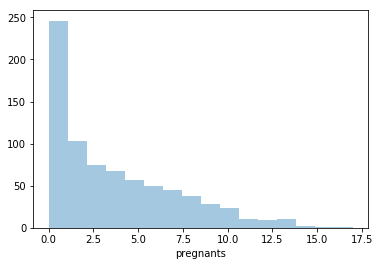

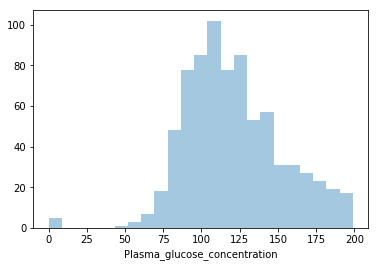

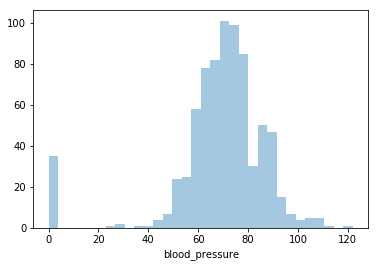

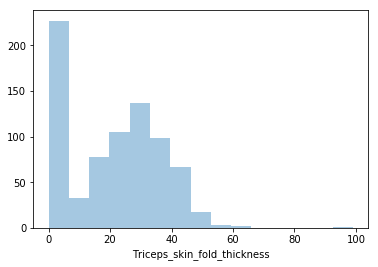

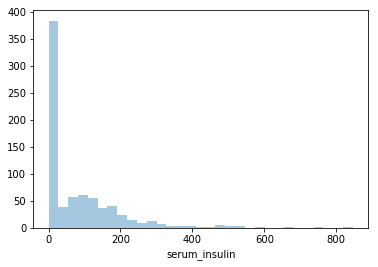

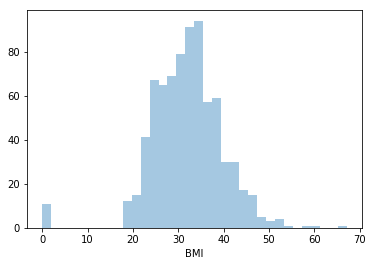

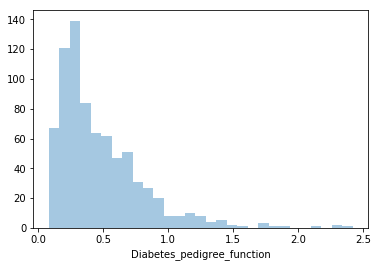

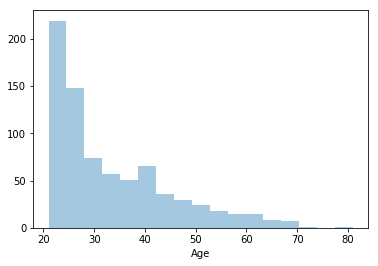

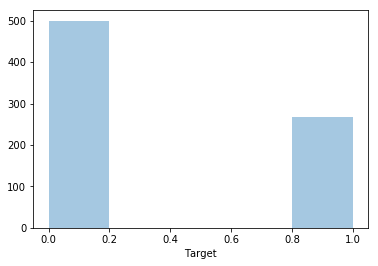

In [11]:
#该问题为分类问题，类别型特征直方图可用countplot
for feature in train.columns:
    sns.distplot(train[feature],kde = False)
    plt.show()

医疗类数据中，一些数据值分布比较广，一般代表着这个数据对应的人不正常，和有可能跟病发事件有关系，比如怀孕17次的那个，三头肌皮褶厚度那个数值大的数据，异常值可能就意味着得病，不能删除

### 怀孕次数pregnants

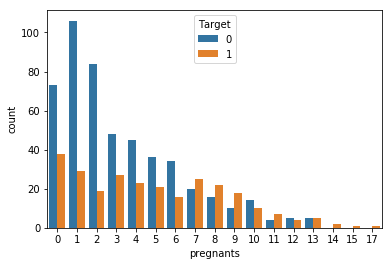

In [12]:
# 怀孕次数和得病之间的关系
sns.countplot(x="pregnants", hue="Target",data=train)

从图中看出，怀孕次数越多，得病的机会越多

### Plasma_glucose_concentration与target的关系
血浆葡萄糖浓度

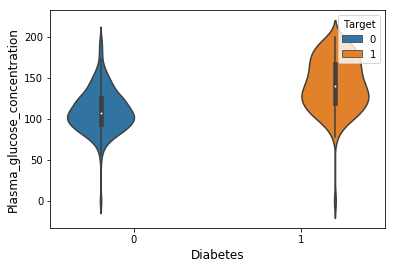

In [13]:
sns.violinplot(x='Target', y='Plasma_glucose_concentration', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Plasma_glucose_concentration', fontsize=12)
plt.show()

这个数值也和发病率有关系

### blood_pressure与target的关系

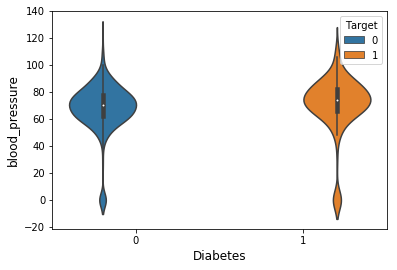

In [14]:
sns.violinplot(x='Target', y='blood_pressure', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('blood_pressure', fontsize=12)
plt.show()

这个看不出来有什么

### Triceps_skin_fold_thickness与target之间的关系
三头肌皮褶厚度（单位：mm）

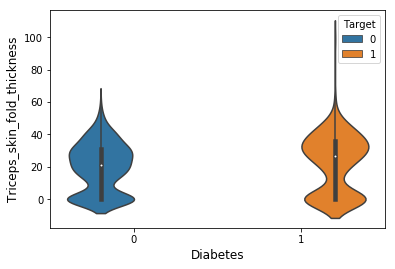

In [16]:
sns.violinplot(x='Target', y='Triceps_skin_fold_thickness', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Triceps_skin_fold_thickness', fontsize=12)
plt.show()

看出发病率的那个上面长长的头部代表着异常数据，和发病率有直接相关

### serum_insulin 与 target之间的关系
餐后血清胰岛素（单位:mm）

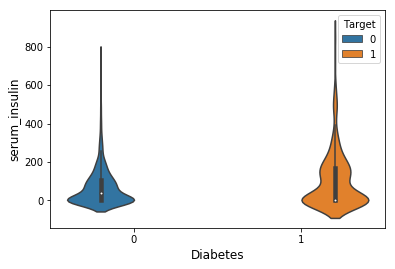

In [17]:
sns.violinplot(x='Target', y='serum_insulin', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('serum_insulin', fontsize=12)
plt.show()

## BMI
体重指数（体重（公斤）/ 身高（米）^2）

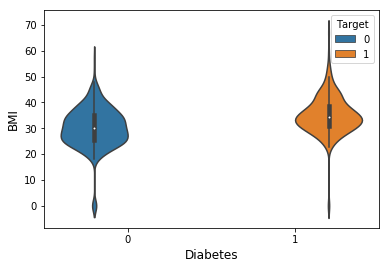

In [18]:
sns.violinplot(x='Target', y='BMI', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()

越胖的人，发病率越高

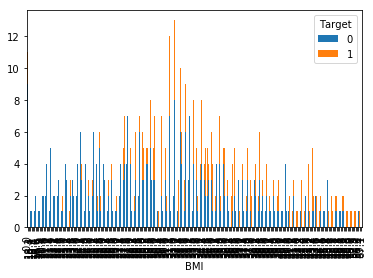

In [20]:
BMIDF = train.groupby(['BMI', 'Target'])['BMI'].count().unstack('Target').fillna(0)
BMIDF[[0,1]].plot(kind='bar', stacked=True)

这个图也可以发现，BMI越大，发病率越高

### Diabetes_pedigree_function，糖尿病家系作用

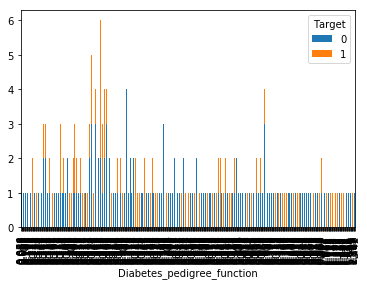

In [21]:
DF = train.groupby(['Diabetes_pedigree_function', 'Target'])['Diabetes_pedigree_function'].count().unstack('Target').fillna(0)
DF[[0,1]].plot(kind='bar', stacked=True)

## Age

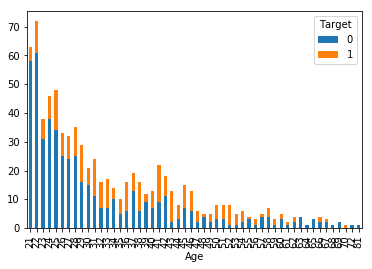

In [22]:
DF = train.groupby(['Age', 'Target'])['Age'].count().unstack('Target').fillna(0)
DF[[0,1]].plot(kind='bar', stacked=True)

发病率跟年龄也有一定的相关性

## 热力图

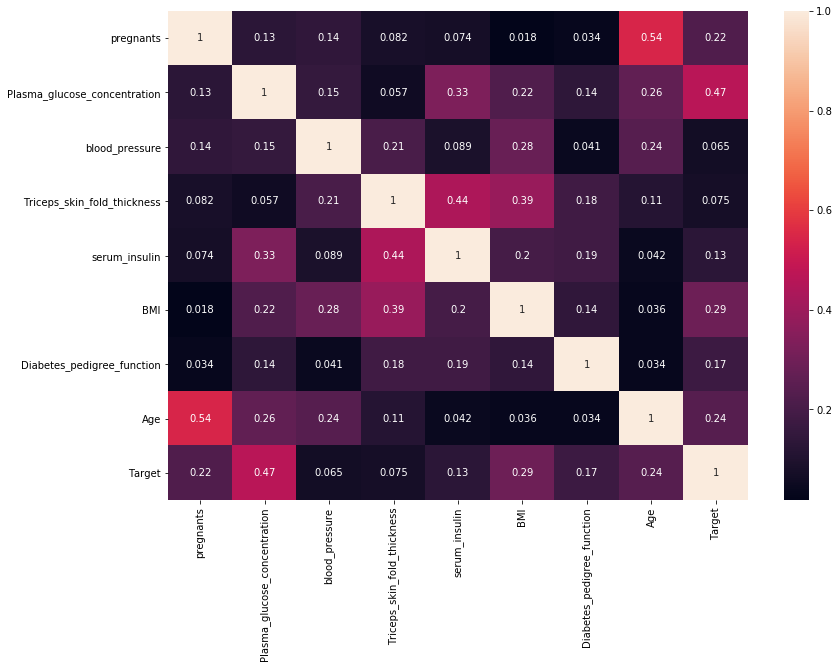

In [23]:
data_corr = train.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

热力图可以看出有些参数是有一些相关性的，可以加入正则项进行校正